In [1]:
import numpy as np
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from comchoice.preprocessing.to_pairwise import to_pairwise
from comchoice.aggregate import borda, divisiveness, win_rate
from glob import glob

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
year = 2021
country = "Chile"
# month = 11
location_level = "province" #constituency

RATE_THRESHOLD = 0.02

In [4]:
rnd = "first_round"
if country == "Spain":
    rnd = month

df = pd.read_csv(f"data_output/{country}/{year}_{rnd}.csv.gz", compression="gzip") #_{rnd}
df.columns = [x.lower() for x in df.columns]
df.head()

,polling_id,candidate,value,rank,rate
0,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,GABRIEL BORIC FONT,22.0,3,0.134969
1,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,JOSE ANTONIO KAST RIST,36.0,2,0.220859
2,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,YASNA PROVOSTE CAMPILLAY,15.0,5,0.092025
3,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,SEBASTIAN SICHEL RAMIREZ,12.0,6,0.073620
4,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,EDUARDO ARTES BRICHETTI,1.0,7,0.006135


In [6]:
dd = df.groupby("candidate").agg({"value": "sum"})
dd["rate"] = dd.apply(lambda x: x/x.sum())
values = list(dd[dd["rate"] > RATE_THRESHOLD].index.unique())
values

['FRANCO PARISI FERNANDEZ',
 'GABRIEL BORIC FONT',
 'JOSE ANTONIO KAST RIST',
 'MARCO ENRIQUEZ-OMINAMI GUMUCIO',
 'SEBASTIAN SICHEL RAMIREZ',
 'YASNA PROVOSTE CAMPILLAY']

In [342]:
tmp[tmp["candidate"] == candidate]["weight"]

0    0.833333
3    0.083333
6    0.083333
Name: weight, dtype: float64

In [351]:
(np.array([m ** 2.6]))

array([[0.62248481, 0.00156361, 0.00156361]])

In [361]:
asd = np.dot(m.reshape(m.shape[0], 1), (np.array([m]) ** 2.6))
np.fill_diagonal(asd, 0)
asd

array([[0.        , 0.00130301, 0.00130301],
       [0.05187373, 0.        , 0.0001303 ],
       [0.05187373, 0.0001303 , 0.        ]])

In [360]:
np.multiply(m, (np.array(m) ** 2.6))

array([5.18737344e-01, 1.30300930e-04, 1.30300930e-04])

In [28]:
dd = df[(df["province"] == "CONCEPCION")].copy()
dd["weight"] = dd.groupby("candidate")["value"].apply(lambda x: x/x.sum())
dd[(dd["candidate"] == "FRANCO PARISI FERNANDEZ")]

,polling_id,candidate,rate,rank,value,province,weight
28350,CHIGUAYANTE-CHIGUAYANTE-COLEGIO AURORA DE CHIL...,FRANCO PARISI FERNANDEZ,0.190476,3,28.0,CONCEPCION,0.000377
28356,CHIGUAYANTE-CHIGUAYANTE-COLEGIO AURORA DE CHIL...,FRANCO PARISI FERNANDEZ,0.125000,5,22.0,CONCEPCION,0.000296
28362,CHIGUAYANTE-CHIGUAYANTE-COLEGIO AURORA DE CHIL...,FRANCO PARISI FERNANDEZ,0.152778,3,33.0,CONCEPCION,0.000444
28368,CHIGUAYANTE-CHIGUAYANTE-COLEGIO AURORA DE CHIL...,FRANCO PARISI FERNANDEZ,0.197531,3,32.0,CONCEPCION,0.000431
28374,CHIGUAYANTE-CHIGUAYANTE-COLEGIO AURORA DE CHIL...,FRANCO PARISI FERNANDEZ,0.335878,1,44.0,CONCEPCION,0.000592
...,...,...,...,...,...,...,...
253062,TOME-TOME-LICEO VICENTE ALBERTO PALACIOS VALDE...,FRANCO PARISI FERNANDEZ,0.070866,6,9.0,CONCEPCION,0.000121
253068,TOME-TOME-LICEO VICENTE ALBERTO PALACIOS VALDE...,FRANCO PARISI FERNANDEZ,0.120000,4,15.0,CONCEPCION,0.000202
253074,TOME-TOME-LICEO VICENTE ALBERTO PALACIOS VALDE...,FRANCO PARISI FERNANDEZ,0.119658,4,14.0,CONCEPCION,0.000189
253080,TOME-TOME-LICEO VICENTE ALBERTO PALACIOS VALDE...,FRANCO PARISI FERNANDEZ,0.123288,4,18.0,CONCEPCION,0.000242


In [10]:
df = pd.merge(df, df_location[["polling_id", "province"]])

In [196]:
asdf = pd.DataFrame([
    ("A", "p", 10, "alfa"),
    ("B", "p", 15, "alfa"),
    ("C", "p", 20, "alfa"),
    ("A", "q", 10, "alfa"),
    ("B", "q", 25, "alfa"),
    ("C", "q", 20, "alfa"),
    ("A", "r", 30, "alfa"),
    ("B", "r", 95, "alfa"),
    ("C", "r", 10, "alfa"),
    ("A", "p", 10, "cc"),
    ("B", "p", 15, "cc"),
    ("C", "p", 20, "cc"),
    ("A", "q", 10, "cc"),
    ("B", "q", 25, "cc"),
    ("C", "q", 20, "cc"),
    ("A", "r", 30, "cc"),
    ("B", "r", 95, "cc"),
    ("C", "r", 10, "cc"),
    ("A", "p", 10, "cc"),
    ("B", "p", 15, "cc"),
    ("C", "p", 20, "cc"),
    ("A", "q", 10, "cc"),
    ("B", "q", 25, "cc"),
    ("C", "q", 20, "cc"),
    ("A", "r", 30, "cc"),
    ("B", "r", 95, "cc"),
    ("C", "r", 10, "cc"),

    ("A", "p", 10, "beta"),
    ("B", "p", 15, "beta"),
    ("C", "p", 20, "beta"),
    ("A", "q", 10, "beta"),
    ("B", "q", 25, "beta"),
    ("C", "q", 20, "beta"),
    ("A", "r", 30, "beta"),
    ("B", "r", 95, "beta"),
    ("C", "r", 10, "beta"),
    ("A", "p", 10, "beta"),
    ("B", "p", 15, "beta"),
    ("C", "p", 20, "beta"),
    ("A", "q", 10, "beta"),
    ("B", "q", 25, "beta"),
    ("C", "q", 20, "beta"),
    ("A", "r", 30, "beta"),
    ("B", "r", 95, "beta"),
    ("C", "r", 10, "beta"),
    ("A", "p", 10, "beta"),
    ("B", "p", 15, "beta"),
    ("C", "p", 20, "beta"),
    ("A", "q", 10, "beta"),
    ("B", "q", 25, "beta"),
    ("C", "q", 20, "beta"),
    ("A", "r", 30, "beta"),
    ("B", "r", 95, "beta"),
    ("C", "r", 10, "beta"),
    ("A", "p", 10, "beta"),
    ("B", "p", 15, "beta"),
    ("C", "p", 20, "beta"),
    ("A", "q", 10, "beta"),
    ("B", "q", 25, "beta"),
    ("C", "q", 20, "beta"),
    ("A", "r", 30, "beta"),
    ("B", "r", 95, "beta"),
    ("C", "r", 10, "beta")
#     ("A", "s", 10, "beta"),
#     ("B", "s", 15, "beta"),
#     ("C", "s", 20, "beta"),
#     ("A", "t", 10, "beta"),
#     ("B", "t", 25, "beta"),
#     ("C", "t", 20, "beta"),
#     ("A", "v", 30, "beta"),
#     ("B", "v", 95, "beta"),
#     ("C", "v", 10, "beta")
], columns=["candidate", "polling_id", "value", "province"])

asdf["rate"] = asdf.groupby(["polling_id", "province"])["value"].apply(lambda x: x/x.sum())
asdf["rank"] = asdf.groupby(["polling_id", "province"])["value"].rank("min", ascending=False).astype(int)

asdf.head()

,candidate,polling_id,value,province,rate,rank
0,A,p,10,alfa,0.222222,3
1,B,p,15,alfa,0.333333,2
2,C,p,20,alfa,0.444444,1
3,A,q,10,alfa,0.181818,3
4,B,q,25,alfa,0.454545,1


In [268]:
asdf = pd.DataFrame([
    ("A", "p1", 10, "aa"),
    ("B", "p1", 15, "aa"),
    ("C", "p1", 20, "aa"),
    ("A", "q1", 10, "aa"),
    ("B", "q1", 25, "aa"),
    ("C", "q1", 20, "aa"),
    ("A", "r1", 30, "aa"),
    ("B", "r1", 95, "aa"),
    ("C", "r1", 10, "aa"),
    
    ("A", "p2", 100, "bb"),
    ("B", "p2", 150, "bb"),
    ("C", "p2", 200, "bb"),
    ("A", "q2", 100, "bb"),
    ("B", "q2", 250, "bb"),
    ("C", "q2", 200, "bb"),
    ("A", "r2", 300, "bb"),
    ("B", "r2", 950, "bb"),
    ("C", "r2", 100, "bb"),
    
    ("A", "s2", 100, "bb"),
    ("B", "s2", 150, "bb"),
    ("C", "s2", 200, "bb"),
    ("A", "t2", 100, "bb"),
    ("B", "t2", 250, "bb"),
    ("C", "t2", 200, "bb"),
    ("A", "u2", 300, "bb"),
    ("B", "u2", 950, "bb"),
    ("C", "u2", 100, "bb")
], columns=["candidate", "polling_id", "value", "province"])

asdf["rate"] = asdf.groupby(["polling_id", "province"])["value"].apply(lambda x: x/x.sum())
asdf["rank"] = asdf.groupby(["polling_id", "province"])["value"].rank("min", ascending=False).astype(int)

asdf.head()

,candidate,polling_id,value,province,rate,rank
0,A,p1,10,aa,0.222222,3
1,B,p1,15,aa,0.333333,2
2,C,p1,20,aa,0.444444,1
3,A,q1,10,aa,0.181818,3
4,B,q1,25,aa,0.454545,1


In [197]:
asdf.sort_values(["candidate", "province"])

,candidate,polling_id,value,province,rate,rank
0,A,p,10,alfa,0.222222,3
3,A,q,10,alfa,0.181818,3
6,A,r,30,alfa,0.222222,2
27,A,p,10,beta,0.055556,9
30,A,q,10,beta,0.045455,9
...,...,...,...,...,...,...
14,C,q,20,cc,0.181818,3
17,C,r,10,cc,0.037037,5
20,C,p,20,cc,0.222222,1
23,C,q,20,cc,0.181818,3


In [198]:
K = asdf.groupby(["candidate", location_level]).agg({"value": "count"}).reset_index()
K

,candidate,province,value
0,A,alfa,3
1,A,beta,12
2,A,cc,6
3,B,alfa,3
4,B,beta,12
5,B,cc,6
6,C,alfa,3
7,C,beta,12
8,C,cc,6


In [270]:
asdf = pd.merge(
    asdf, 
    asdf.groupby("polling_id").agg({"value": "sum"}).rename(columns={"value": "N"}).reset_index(),
    on="polling_id"
)

In [275]:
df = pd.merge(
    df, 
    df.groupby("polling_id").agg({"value": "sum"}).rename(columns={"value": "N"}).reset_index(),
    on="polling_id"
)

In [405]:
def gini2(x, weights=None):
    if weights is None:
        weights = np.ones_like(x)
    count = np.multiply.outer(weights, weights)
    print(count.sum())
    mad = np.abs(np.subtract.outer(x, x) * count).sum() / count.sum()
    rmad = mad #/ np.average(x, weights=weights)
    return 0.5 * rmad

In [397]:
np.subtract.outer([1, 2, 3], [1, 2, 3])

array([[ 0, -1, -2],
       [ 1,  0, -1],
       [ 2,  1,  0]])

In [404]:
gini2(list(ea["rate"]), list(ea["weight2"]))

1.0


0.09919534326939045

In [385]:
ea = df[(df["province"] == "DEL TAMARUGAL") & (df["candidate"] == "JOSE ANTONIO KAST RIST")].reset_index().copy()
oa = ea.groupby("polling_id").agg({"N": "mean"}).rename(columns={"N": "weight2"}).apply(lambda x: x/x.sum()).reset_index()
ea = pd.merge(ea, oa, on="polling_id").fillna(0)

ea

,index,polling_id,candidate,rate,rank,value,province,weight,N,weight2
0,20546,CAMIÑA-CAMIÑA-ESCUELA CAMIÑA-1-M-1M,JOSE ANTONIO KAST RIST,0.470149,1,63.0,DEL TAMARUGAL,0.000032,134.0,0.012206
1,20552,CAMIÑA-CAMIÑA-ESCUELA CAMIÑA-1-V-1V-10,JOSE ANTONIO KAST RIST,0.455446,1,46.0,DEL TAMARUGAL,0.000024,101.0,0.009200
2,20558,CAMIÑA-CAMIÑA-ESCUELA CAMIÑA-2-M-2M-6M,JOSE ANTONIO KAST RIST,0.495495,1,55.0,DEL TAMARUGAL,0.000028,111.0,0.010111
3,20564,CAMIÑA-CAMIÑA-ESCUELA CAMIÑA-3-M-3M-4M,JOSE ANTONIO KAST RIST,0.450000,1,45.0,DEL TAMARUGAL,0.000023,100.0,0.009109
4,20570,CAMIÑA-CAMIÑA-ESCUELA CAMIÑA-4-V-4V-6V-7V,JOSE ANTONIO KAST RIST,0.423423,2,47.0,DEL TAMARUGAL,0.000024,111.0,0.010111
...,...,...,...,...,...,...,...,...,...,...
122,163544,POZO ALMONTE-POZO ALMONTE-LICEO ALCALDE SERGIO...,JOSE ANTONIO KAST RIST,0.227642,2,28.0,DEL TAMARUGAL,0.000014,123.0,0.011204
123,163550,POZO ALMONTE-POZO ALMONTE-LICEO ALCALDE SERGIO...,JOSE ANTONIO KAST RIST,0.265306,2,26.0,DEL TAMARUGAL,0.000013,98.0,0.008927
124,163556,POZO ALMONTE-POZO ALMONTE-LICEO ALCALDE SERGIO...,JOSE ANTONIO KAST RIST,0.375000,1,36.0,DEL TAMARUGAL,0.000018,96.0,0.008745
125,163562,POZO ALMONTE-POZO ALMONTE-LICEO ALCALDE SERGIO...,JOSE ANTONIO KAST RIST,0.297297,2,22.0,DEL TAMARUGAL,0.000011,74.0,0.006741


In [439]:
def er_polarization(rates, weights, alpha=0.25, K=1000):
    xx = np.multiply.outer(weights ** (1 + alpha), weights)
    yy = np.absolute(np.subtract.outer(rates, rates))
    # avg = np.average(rates, weights=weights)
    
    return K * np.sum(xx * yy)

In [443]:
output = []

alpha = 0.25
for idx, data in df[df["province"] == "CONCEPCION"].groupby(["candidate", location_level]):
    candidate, geography = idx
    data = data.fillna(0)
    data["weight"] = data["N"] / data["N"].sum()
    weights = data["weight"].fillna(0).values #
    rates = data["rate"].fillna(0).values
    
    value = er_polarization(rates, weights, alpha=0.25, K=1000)
    
    output.append({
        "value": value,
        "candidate": candidate,
        location_level: geography
    })
    
pd.DataFrame(output).sort_values("province")

,value,candidate,province
0,10.841052,FRANCO PARISI FERNANDEZ,CONCEPCION
1,8.492833,GABRIEL BORIC FONT,CONCEPCION
2,9.006108,JOSE ANTONIO KAST RIST,CONCEPCION
3,4.254701,MARCO ENRIQUEZ-OMINAMI GUMUCIO,CONCEPCION
4,6.336650,SEBASTIAN SICHEL RAMIREZ,CONCEPCION
5,7.043395,YASNA PROVOSTE CAMPILLAY,CONCEPCION


In [311]:
asd = pd.DataFrame(output)
asd.sort_values("value", ascending=False).dropna().head(100)

,value,candidate,province
0,6.635670,FRANCO PARISI FERNANDEZ,DEL TAMARUGAL
2,6.176099,JOSE ANTONIO KAST RIST,DEL TAMARUGAL
1,4.130376,GABRIEL BORIC FONT,DEL TAMARUGAL
5,3.721686,YASNA PROVOSTE CAMPILLAY,DEL TAMARUGAL
4,2.207946,SEBASTIAN SICHEL RAMIREZ,DEL TAMARUGAL
3,2.000219,MARCO ENRIQUEZ-OMINAMI GUMUCIO,DEL TAMARUGAL


'cde'

In [233]:
asd = pd.DataFrame(output)
asd = pd.merge(asd, K.rename(columns={"value": "K"}), on=[location_level, "candidate"])
asd["value3"] = asd["value"] * asd["g"]
asd["value4"] = asd["value"] * (asd["K"]**2)
asd.sort_values("candidate", ascending=False).dropna()

,value,candidate,province,K,g,value3,value4
6,0.022176,C,alfa,3,0.142857,0.003168,0.199582
7,0.000603,C,beta,12,0.571429,0.000345,0.086873
8,0.003658,C,cc,6,0.285714,0.001045,0.131675
3,0.038299,B,alfa,3,0.142857,0.005471,0.344691
4,0.001042,B,beta,12,0.571429,0.000595,0.150035
5,0.006317,B,cc,6,0.285714,0.001805,0.227411
0,0.002756,A,alfa,3,0.142857,0.000394,0.024808
1,0.000075,A,beta,12,0.571429,0.000043,0.010798
2,0.000455,A,cc,6,0.285714,0.000130,0.016367


In [174]:
asdf[(asdf["candidate"] == "C") & (asdf["province"] == "cc")]

,candidate,polling_id,value,province,rate,rank
11,C,p,20,cc,0.222222,1
14,C,q,20,cc,0.181818,3
17,C,r,10,cc,0.037037,5
20,C,p,20,cc,0.222222,1
23,C,q,20,cc,0.181818,3
26,C,r,10,cc,0.037037,5


In [175]:
asdf[(asdf["candidate"] == "C") & (asdf["province"] == "beta")]

,candidate,polling_id,value,province,rate,rank
29,C,p,20,beta,0.222222,1
32,C,q,20,beta,0.181818,3
35,C,r,10,beta,0.037037,5
38,C,s,20,beta,0.222222,1
41,C,t,20,beta,0.181818,3
44,C,v,10,beta,0.037037,5
47,C,p,20,beta,0.222222,1
50,C,q,20,beta,0.181818,3
53,C,r,10,beta,0.037037,5
56,C,s,20,beta,0.222222,1


In [378]:
P = 0
candidate = "A"
for i, tmp_a in tmp[tmp["candidate"] == candidate].iterrows():
    polling_a = tmp_a["polling_id"]
    weight_a = tmp_a["weight"]
    rate_a = tmp_a["rate"]
    for j, tmp_b in tmp[tmp["candidate"] == candidate].iterrows():
        polling_b = tmp_b["polling_id"]
        weight_b = tmp_b["weight"]
        rate_b = tmp_b["rate"]
        if polling_a != polling_b:
            P += weight_a * (weight_b**2.6) *np.absolute(rate_a - rate_b)
P

0.022602799287368306

In [190]:
df.groupby("candidate").agg({"rate": "std"}).sort_values("rate")

,rate
candidate,
EDUARDO ARTES BRICHETTI,0.012469
MARCO ENRIQUEZ-OMINAMI GUMUCIO,0.040383
YASNA PROVOSTE CAMPILLAY,0.055938
SEBASTIAN SICHEL RAMIREZ,0.056915
FRANCO PARISI FERNANDEZ,0.090248
GABRIEL BORIC FONT,0.095510
JOSE ANTONIO KAST RIST,0.099557


In [7]:
df = df[df["candidate"].isin(values)]
# df_runoff = df_runoff[df_runoff["candidate"].isin(values)]

In [8]:
tt = df.groupby(["polling_id", "candidate"]).agg({"value": "sum"})
tt["rate"] = tt.groupby(level=[0]).apply(lambda x: x/x.sum())
tt["rank"] = tt.groupby(["polling_id"])["value"].rank("min", ascending=False).astype(int)
tt = tt.reset_index()
df = tt[["polling_id", "candidate", "rate", "rank", "value"]]

<AxesSubplot:xlabel='rate', ylabel='Count'>

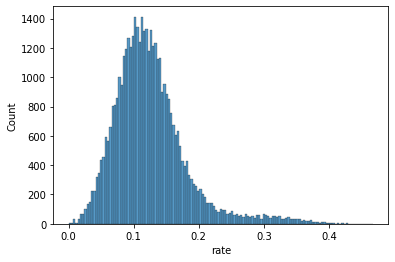

In [206]:
sns.histplot(bb[bb["candidate"] == "SEBASTIAN SICHEL RAMIREZ"]["rate"])

In [212]:
data = pd.merge(df_location[[location_level, "polling_id"]].drop_duplicates(), df.copy(), on="polling_id").copy()
data

,province,polling_id,candidate,value,rank,rate
0,IQUIQUE,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,GABRIEL BORIC FONT,22.0,3,0.134969
1,IQUIQUE,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,JOSE ANTONIO KAST RIST,36.0,2,0.220859
2,IQUIQUE,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,YASNA PROVOSTE CAMPILLAY,15.0,5,0.092025
3,IQUIQUE,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,SEBASTIAN SICHEL RAMIREZ,12.0,6,0.073620
4,IQUIQUE,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,MARCO ENRIQUEZ-OMINAMI GUMUCIO,18.0,4,0.110429
...,...,...,...,...,...,...
279829,DIGUILLIN,YUNGAY-YUNGAY-LICEO DE YUNGAY-21-M-21M,JOSE ANTONIO KAST RIST,53.0,1,0.297753
279830,DIGUILLIN,YUNGAY-YUNGAY-LICEO DE YUNGAY-21-M-21M,YASNA PROVOSTE CAMPILLAY,20.0,5,0.112360
279831,DIGUILLIN,YUNGAY-YUNGAY-LICEO DE YUNGAY-21-M-21M,SEBASTIAN SICHEL RAMIREZ,30.0,3,0.168539
279832,DIGUILLIN,YUNGAY-YUNGAY-LICEO DE YUNGAY-21-M-21M,MARCO ENRIQUEZ-OMINAMI GUMUCIO,10.0,6,0.056180


In [216]:
output = []

for i, tmp in data.groupby(location_level):
    for candidate, tmp_cand in tmp.groupby("candidate"):
        output.append({
            "candidate": candidate,
            "value": skew(tmp_cand["rate"]),
            location_level: i
        })
        print(i, candidate, skew(tmp_cand["rate"]))

ANTARTICA CHILENA FRANCO PARISI FERNANDEZ 0.08423690598566172
ANTARTICA CHILENA GABRIEL BORIC FONT -0.4076638945746349
ANTARTICA CHILENA JOSE ANTONIO KAST RIST 0.5500764277079029
ANTARTICA CHILENA MARCO ENRIQUEZ-OMINAMI GUMUCIO -0.4418405274313637
ANTARTICA CHILENA SEBASTIAN SICHEL RAMIREZ 0.6536765134752703
ANTARTICA CHILENA YASNA PROVOSTE CAMPILLAY -0.05344019898794751
ANTOFAGASTA FRANCO PARISI FERNANDEZ 0.6743717388002899
ANTOFAGASTA GABRIEL BORIC FONT 0.3125139443980495
ANTOFAGASTA JOSE ANTONIO KAST RIST 0.27602055702578
ANTOFAGASTA MARCO ENRIQUEZ-OMINAMI GUMUCIO 0.4935315607934028
ANTOFAGASTA SEBASTIAN SICHEL RAMIREZ 0.3295404704049077
ANTOFAGASTA YASNA PROVOSTE CAMPILLAY 0.418436102781412
ARAUCO FRANCO PARISI FERNANDEZ 0.6887539473930535
ARAUCO GABRIEL BORIC FONT 0.4668812869648854
ARAUCO JOSE ANTONIO KAST RIST 0.3096656196792526
ARAUCO MARCO ENRIQUEZ-OMINAMI GUMUCIO 0.48987908127074786
ARAUCO SEBASTIAN SICHEL RAMIREZ 0.39875602871430044
ARAUCO YASNA PROVOSTE CAMPILLAY 0.17329111

In [141]:
cc = bb[(bb["value"] > 500)].dropna().groupby("candidate").agg({"rate": ["max", "min", "mean", "median", "std"]})
cc["right"] = cc[("rate", "max")] - cc[("rate", "median")]
cc.sort_values("right")

rate                                          \
                            max       min      mean    median       std   
candidate                                                                 
Nicolas DUPONT-AIGNAN  0.132450  0.000000  0.020515  0.019455  0.009460   
Yannick JADOT          0.168801  0.000000  0.049802  0.046543  0.023946   
Jean LASSALLE          0.277700  0.000000  0.029470  0.024809  0.019987   
Fabien ROUSSEL         0.300546  0.000000  0.023984  0.021779  0.013853   
Valérie PÉCRESSE       0.376812  0.000000  0.048902  0.045067  0.024256   
Emmanuel MACRON        0.656284  0.046536  0.292157  0.288217  0.077746   
Marine LE PEN          0.664957  0.011589  0.230438  0.227554  0.101851   
Éric ZEMMOUR           0.650854  0.000000  0.073996  0.068541  0.032010   
Jean-Luc MÉLENCHON     0.900149  0.016254  0.230735  0.200946  0.111217   

                          right  
                                 
candidate                        
Nicolas DUPONT-AIGNAN  0.112995  
Yannick JADOT          0.122258  
Jean LASSALLE          0.252891  
Fabien ROUSSEL         0.278768  
Valérie PÉCRESSE       0.331745  
Emmanuel MACRON        0.368067  
Marine LE PEN          0.437403  
Éric ZEMMOUR           0.582313  
Jean-Luc MÉLENCHON     0.699203

In [116]:
df[df["polling_id"] == "05-99-0001"]

,polling_id,candidate,value,rank,rate
72079,05-99-0001,Fabien ROUSSEL,2,7,0.028986
141761,05-99-0001,Emmanuel MACRON,18,1,0.260870
211443,05-99-0001,Jean LASSALLE,5,4,0.072464
281125,05-99-0001,Marine LE PEN,17,2,0.246377
350807,05-99-0001,Éric ZEMMOUR,4,6,0.057971
420489,05-99-0001,Jean-Luc MÉLENCHON,16,3,0.231884
559853,05-99-0001,Yannick JADOT,5,4,0.072464
629535,05-99-0001,Valérie PÉCRESSE,1,8,0.014493
768899,05-99-0001,Nicolas DUPONT-AIGNAN,0,10,0.000000


In [5]:
df_runoff = pd.read_csv(f"data_output/{country}/{year}_runoff.csv.gz", compression="gzip")
df_runoff.columns = [x.lower() for x in df_runoff.columns]
df_runoff.head()

,polling_id,candidate,value,rank,rate
0,261_1_1,Traian Băsescu,493,1,0.536453
1,261_1_1,Mircea Geoană,426,2,0.463547
2,261_1_2,Traian Băsescu,412,1,0.575419
3,261_1_2,Mircea Geoană,304,2,0.424581
4,261_1_3,Traian Băsescu,491,1,0.554176


In [9]:
df_location = pd.read_csv(f"data_output/{country}/{year}_{rnd}_location.csv.gz", compression="gzip") #_{rnd}
df_location.head()

,polling_id,region_id,region,province,senate_district,district,commune,electoral_circ,polling_place,polling_table,polling_type,mixed_polling,voters
0,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20,M,20M,333
1,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,21,M,21M,340
2,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,22,M,22M,341
3,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,23,M,23M,344
4,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,24,M,24M,342


In [19]:
df1 = pd.merge(df, df_location[["polling_id", location_level]])

df1 = df1.groupby([location_level, "candidate"]).agg({"value": "sum"})
df1["rate"] = df1.groupby(level=[0]).apply(lambda x: x/x.sum())
df1 = df1.reset_index()

df2 = pd.merge(df_runoff, df_location[["polling_id", location_level]])

df2 = df2.groupby([location_level, "candidate"]).agg({"value": "sum"})
df2["rate"] = df2.groupby(level=[0]).apply(lambda x: x/x.sum())
df2 = df2.reset_index()

df_rounds = pd.merge(df1, df2, on=[location_level, "candidate"])
df_rounds["diff"] = df_rounds["rate_y"] - df_rounds["rate_x"]

NameError: name 'df_runoff' is not defined

In [20]:
path = f"data_output/{country}/{year}_pairwise.csv.gz"

if not os.path.isfile(path):

    df_pwc = to_pairwise(
        df,
        alternative="candidate",
        verbose=True,
        voter="polling_id"
    )
    df_pwc.to_csv(path, compression="gzip", index=False)
    
else: 
    df_pwc = pd.read_csv(path, compression="gzip")

100%|███████████████████████████████████████████████████████████████| 7842/7842 [00:24<00:00, 325.65it/s]


In [10]:
# data = pd.merge(df_location[[location_level, "polling_id"]].drop_duplicates(), df.copy(), on="polling_id").copy()

# df_dv = data.groupby([location_level, "candidate"]).agg({"rank": "std"}).reset_index()\
#     .rename(columns={"rank": "value", "candidate": "alternative"})

In [16]:
location_level

'province_id'

In [21]:
data = pd.merge(df_location[[location_level, "polling_id"]].drop_duplicates(), df.copy(), on="polling_id").copy()

df_dv = data.groupby([location_level, "candidate"]).agg({"rate": "std"}).rename(columns={"rate": "value"}).reset_index()
path = f"data_output/{country}/{year}_divisiveness_{location_level}.csv.gz"

df_dv.to_csv(path, compression="gzip", index=False)

In [12]:
# df_test = pd.merge(df_rounds, df_dv, on=["candidate", location_level])
# df_test.head()

# sns.set(font_scale=2)
# plt.figure(figsize=(7, 7))

# g = sns.scatterplot(x="value", y="diff", hue="candidate", s=70,
#                data=df_test[(df_test["value"] > 0) & (df_test["value"] < 1)])
# g.set_xlabel("Divisiveness")
# # g.set_xlabel("Votes (%) First Round")
# g.set_ylabel("Growth Rate First Round and Runoff")

# # g.set_axis_labels("Divisiveness", "Growth Rate First Round and Runoff")
# plt.legend(title="", loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=False, shadow=False, frameon=False, ncol=1)

# # plt.xscale('log')
# # plt.yscale('log')

In [3]:
import pandas as pd
pd.read_csv("data_output/Romania/2009_divisiveness_county_name.csv.gz", compression="gzip")

,alternative,value,rank,county_name
0,Hunor Kelemen,0.458966,1,Alba
1,Mircea Geoană,0.387874,2,Alba
2,Sorin Oprescu,0.340134,3,Alba
3,Crin Antonescu,0.305117,4,Alba
4,Corneliu Vadim Tudor,0.302075,5,Alba
...,...,...,...,...
511,Constantin Rotaru,0.177891,8,Vrancea
512,Gheorghe-Eduard Manole,0.167600,9,Vrancea
513,Mircea Geoană,0.167049,10,Vrancea
514,Constantin Ninel Potârcă,0.148876,11,Vrancea


In [207]:
# dv = divisiveness(
#     df_pwc,
#     method=win_rate,
#     voter="polling_id",
#     method_kws=dict(voter="polling_id")
# )
# dv

In [13]:

# path = f"data_output/{country}/{year}_divisiveness_{location_level}.csv.gz"

# if not os.path.isfile(path):

#     output = []

#     data = pd.merge(df_location[[location_level, "polling_id"]].drop_duplicates(), df_pwc.copy(), on="polling_id").copy()
#     for i, tmp in data.groupby(location_level):
#         dv = divisiveness(
#             tmp,
#             method=win_rate,
#             voter="polling_id",
#             method_kws=dict(voter="polling_id")
#         )
#         dv[location_level] = i
#         output.append(dv)

#         print(i)


#     df_dv = pd.concat(output, ignore_index=True)
#     df_dv.to_csv(path, compression="gzip", index=False)
    
# else:
#     df_dv = pd.read_csv(path, compression="gzip")

# df_dv.head()